<a href="https://colab.research.google.com/github/Podushka228/MiTMOvPZ/blob/main/Zadanie_5_MiTMOvPZ_%D0%AF%D0%BC%D1%89%D0%B8%D0%BA%D0%BE%D0%B2_%D0%9C%D0%B8%D1%85%D0%B0%D0%B8%D0%BB_6015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание
1. Кластеризовать свой датасет любой моделью
  - скорее всего понадобятся pipeline и scaler
2. Визуализировать результаты кластеризации:
  - спроецировать датасет на плоскость с помощью TSNE
  - раскрасить кластеры

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/nba-players.csv',index_col=0)
df.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [ ]:
Xa=df.drop(['name'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

L=LabelEncoder()
Xa["target_5yrs"]=L.fit_transform(Xa["target_5yrs"])
Xa.head()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [ ]:
# Препроцессинг, пайплайн
nkm = Pipeline([('prep', StandardScaler()), ('clusterer', KMeans(2))])
nkm.fit(Xa)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('prep', StandardScaler()),
                ('clusterer', KMeans(n_clusters=2))])

Визуализировать результаты кластеризации:

In [ ]:
from sklearn.manifold import TSNE
df_ = pd.DataFrame(TSNE(n_components=2).fit_transform(nkm['prep'].transform(Xa)))
df_['cluster']=nkm['clusterer'].labels_

In [ ]:
df_.head()

,0,1,cluster
0,-14.784468,29.373091,1
1,-13.830706,29.543346,0
2,-24.978743,21.777939,1
3,1.152648,-10.372457,1
4,11.442536,-33.061481,1


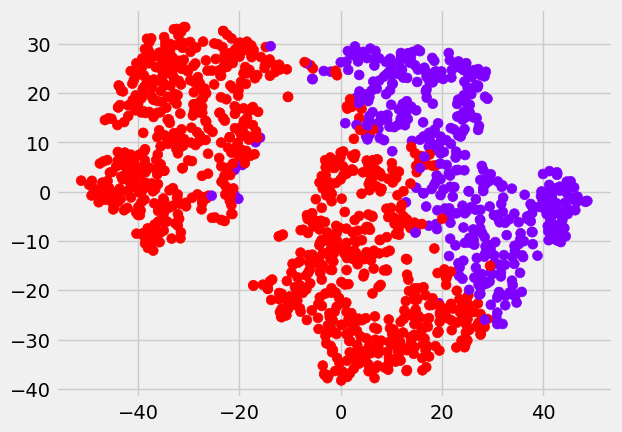

In [ ]:
plt.scatter(df_[0], df_[1], c=df_["cluster"], cmap='rainbow', s = 50)
plt.show()